In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



In [104]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date",parse_dates = ['date'])

In [105]:
df = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]



In [108]:
df_bar = df.copy(deep=True)
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar = df_bar.groupby(["year","month"])['value'].mean().reset_index().sort_values(by=['year','month'])
df_bar = df_bar.set_index('year')

df_bar = df_bar.pivot_table(values = "value", index=df_bar.index, columns="month", aggfunc='first').reset_index()
df_bar = df_bar.set_index('year')
df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_bar= df_bar.fillna(0)

KeyError: 'years'

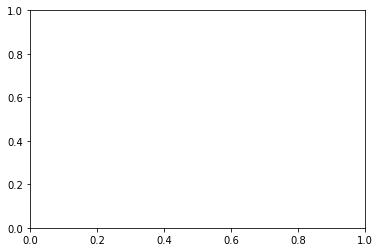

In [112]:
fig, ax = plt.subplots()

bar = df_bar.plot.bar('years', 'value')
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title='Months')

In [102]:
df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,0.000000,0.000000,0.000000,0.000000,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


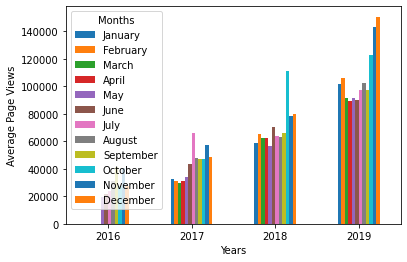

In [119]:
df_bar = df.copy(deep=True)


df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar = df_bar.groupby(["year","month"])['value'].mean().reset_index().sort_values(by=['year','month'])
df_bar = df_bar.set_index('year')
df_bar = df_bar.pivot_table(values = "value", index=df_bar.index, columns="month", aggfunc='first').reset_index()

df_bar = df_bar.set_index('year')
df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_bar= df_bar.fillna(0)


fig, ax = plt.subplots()

bar = df_bar.plot.bar(rot=0, ax=ax)
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title='Months')

In [3]:
test = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                               'Parrot', 'Parrot'],
                    'Max Speed': [380., 370., 24., 26.]})

In [14]:
ces = test.groupby("Animal")

In [23]:
ces